In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
df = pd.read_excel('Online Retail.xlsx')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [10]:
df['Description'] = df['Description'].str.strip()

In [12]:
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [13]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [16]:
df[df.InvoiceNo.str.contains('C', na=False)].head()

InvoiceNo StockCode                      Description  Quantity  \
141   C536379         D                         Discount        -1   
154   C536383    35004C  SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE       -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES       -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES       -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom

In [21]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [25]:
df['Country'].value_counts().plot(kind='barh', figsize =(15,10))

In [35]:
basket = df[df['Country']=='United Kingdom'].groupby(['InvoiceNo','Description'])['Quantity']

In [80]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [79]:
basket.sum().unstack().fillna(0)

Description  *Boombox Ipod Classic  *USB Office Mirror Ball  \
InvoiceNo                                                     
536365                         0.0                      0.0   
536366                         0.0                      0.0   
536367                         0.0                      0.0   
536368                         0.0                      0.0   
536369                         0.0                      0.0   
...                            ...                      ...   
581585                         0.0                      0.0   
581586                         0.0                      0.0   
A563185                        0.0                      0.0   
A563186                        0.0                      0.0   
A563187                        0.0                      0.0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                          0.0                         0.0   
536366                          0.0                         0.0   
536367                          0.0                         0.0   
536368                          0.0                         0.0   
536369                          0.0                         0.0   
...                             ...                         ...   
581585                          0.0                         0.0   
581586                          0.0                         0.0   
A563185                         0.0                         0.0   
A563186                         0.0                         0.0   
A563187                         0.0                         0.0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                             0.0                        0.0   
536366                             0.0                        0.0   
536367                             0.0                        0.0   
536368                             0.0                        0.0   
536369                             0.0                        0.0   
...                                ...                        ...   
581585                             0.0                        0.0   
581586                             0.0                        0.0   
A563185                            0.0                        0.0   
A563186                            0.0                        0.0   
A563187                            0.0                        0.0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                     
536365                                0.0                               0.0   
536366                                0.0                               0.0   
536367                                0.0                               0.0   
536368                                0.0                               0.0   
536369                                0.0                               0.0   
...                                   ...                               ...   
581585                                0.0                               0.0   
581586                                0.0                               0.0   
A563185                               0.0                               0.0   
A563186                               0.0                               0.0   
A563187                               0.0                               0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                   0.0                            0.0   
536366                                   0.0                            0.0   
536367                                   0.0                      

In [73]:
df[df['Country'] == 'United Kingdom']['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581584', '581585', '581586'],
      dtype=object)

In [81]:
def encode_data(datapoint):
    if datapoint <=0:
        return 0
    else:
        return 1

In [94]:
basket = basket.applymap(encode_data)

In [101]:
basket

Description  *Boombox Ipod Classic  *USB Office Mirror Ball  \
InvoiceNo                                                     
536365                           0                        0   
536366                           0                        0   
536367                           0                        0   
536368                           0                        0   
536369                           0                        0   
...                            ...                      ...   
581585                           0                        0   
581586                           0                        0   
A563185                          0                        0   
A563186                          0                        0   
A563187                          0                        0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                            0                           0   
536366                            0                           0   
536367                            0                           0   
536368                            0                           0   
536369                            0                           0   
...                             ...                         ...   
581585                            0                           0   
581586                            0                           0   
A563185                           0                           0   
A563186                           0                           0   
A563187                           0                           0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                               0                          0   
536366                               0                          0   
536367                               0                          0   
536368                               0                          0   
536369                               0                          0   
...                                ...                        ...   
581585                               0                          0   
581586                               0                          0   
A563185                              0                          0   
A563186                              0                          0   
A563187                              0                          0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                     
536365                                  0                                 0   
536366                                  0                                 0   
536367                                  0                                 0   
536368                                  0                                 0   
536369                                  0                                 0   
...                                   ...                               ...   
581585                                  0                                 0   
581586                                  0                                 0   
A563185                                 0                                 0   
A563186                                 0                                 0   
A563187                                 0                                 0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                     0                              0   
536366                                     0                              0   
536367                                     0                      

In [88]:
pd.set_option('max_column',20)

In [92]:
basket.drop('POSTAGE', axis=1, inplace=True) 

In [96]:
itemset = apriori(basket, min_support=0.03, use_colnames=True)

In [98]:
rules = association_rules(itemset, metric='confidence', min_threshold=0.5)

In [100]:
rules

antecedents                        consequents  \
0         (ALARM CLOCK BAKELIKE GREEN)         (ALARM CLOCK BAKELIKE RED)   
1           (ALARM CLOCK BAKELIKE RED)       (ALARM CLOCK BAKELIKE GREEN)   
2     (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
3    (GREEN REGENCY TEACUP AND SAUCER)   (PINK REGENCY TEACUP AND SAUCER)   
4    (ROSES REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
5    (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER)   
6     (JUMBO  BAG BAROQUE BLACK WHITE)          (JUMBO BAG RED RETROSPOT)   
7            (JUMBO BAG PINK POLKADOT)          (JUMBO BAG RED RETROSPOT)   
8  (JUMBO SHOPPER VINTAGE RED PAISLEY)          (JUMBO BAG RED RETROSPOT)   
9             (JUMBO STORAGE BAG SUKI)          (JUMBO BAG RED RETROSPOT)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.046928            0.049821  0.030160    0.642694  12.900183   
1            0.049821            0.046928  0.030160    0.605376  12.900183   
2            0.037660            0.050035  0.030910    0.820768  16.403939   
3            0.050035            0.037660  0.030910    0.617773  16.403939   
4            0.051267            0.050035  0.037553    0.732497  14.639752   
5            0.050035            0.051267  0.037553    0.750535  14.639752   
6            0.048749            0.103820  0.030535    0.626374   6.033290   
7            0.062088            0.103820  0.042053    0.677308   6.523895   
8            0.060695            0.103820  0.035196    0.579876   5.585425   
9            0.060535            0.103820  0.037392    0.617699   5.949737   

   leverage  conviction  
0  0.027822    2.659288  
1  0.027822    2.415142  
2  0.029026    5.300203  
3  0.029026    2.517719  
4  0.034988    3.551237  
5  0.034988    3.803076  
6  0.025474    2.398601  
7  0.035607    2.777201  
8  0.028894    2.133135  
9  0.031108    2.344176

In [99]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
dtypes: float64(7), object(2)
memory usage: 848.0+ bytes


In [196]:
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0]).astype('unicode')

In [193]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0]).astype('unicode')

In [199]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'], '[',rules.loc[i, 'support'], ',',rules.loc[i, 'confidence'],']')

ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE RED [ 0.030160175711148016 , 0.6426940639269406 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE GREEN [ 0.030160175711148016 , 0.6053763440860216 ]
PINK REGENCY TEACUP AND SAUCER ==> GREEN REGENCY TEACUP AND SAUCER [ 0.030910162318530027 , 0.8207681365576103 ]
GREEN REGENCY TEACUP AND SAUCER ==> PINK REGENCY TEACUP AND SAUCER [ 0.030910162318530027 , 0.6177730192719486 ]
ROSES REGENCY TEACUP AND SAUCER ==> GREEN REGENCY TEACUP AND SAUCER [ 0.03755290084105641 , 0.7324973876698014 ]
GREEN REGENCY TEACUP AND SAUCER ==> ROSES REGENCY TEACUP AND SAUCER [ 0.03755290084105641 , 0.7505353319057816 ]
JUMBO  BAG BAROQUE BLACK WHITE ==> JUMBO BAG RED RETROSPOT [ 0.03053516901483902 , 0.6263736263736264 ]
JUMBO BAG PINK POLKADOT ==> JUMBO BAG RED RETROSPOT [ 0.042052820485348474 , 0.6773080241587576 ]
JUMBO SHOPPER VINTAGE RED PAISLEY ==> JUMBO BAG RED RETROSPOT [ 0.03519580007499866 , 0.5798764342453663 ]
JUMBO STORAGE BAG SUKI ==> JUMBO BA

In [201]:
support = rules['support'].values
confidence = rules['confidence'].values

In [203]:
confidence

array([0.64269406, 0.60537634, 0.82076814, 0.61777302, 0.73249739,
       0.75053533, 0.62637363, 0.67730802, 0.57987643, 0.61769912])

In [204]:
plt.figure(figsize=(6,6))
plt.title('Association Rule')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

In [205]:
from mlxtend.frequent_patterns import fpgrowth

In [206]:
itemsets = fpgrowth(basket, min_support=0.03, use_colnames=True)

In [212]:
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0]).astype('unicode')
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0]).astype('unicode')

In [213]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'], '[',rules.loc[i, 'support'], ',',rules.loc[i, 'confidence'],']')

J ==> J [ 0.042052820485348474 , 0.6773080241587576 ]
J ==> J [ 0.037392189425188835 , 0.6176991150442478 ]
J ==> J [ 0.03053516901483902 , 0.6263736263736264 ]
J ==> J [ 0.03519580007499866 , 0.5798764342453663 ]
A ==> A [ 0.030160175711148016 , 0.6426940639269406 ]
A ==> A [ 0.030160175711148016 , 0.6053763440860216 ]
R ==> G [ 0.03755290084105641 , 0.7324973876698014 ]
G ==> R [ 0.03755290084105641 , 0.7505353319057816 ]
P ==> G [ 0.030910162318530027 , 0.8207681365576103 ]
G ==> P [ 0.030910162318530027 , 0.6177730192719486 ]


In [214]:
support = rules['support'].values
confidence = rules['confidence'].values

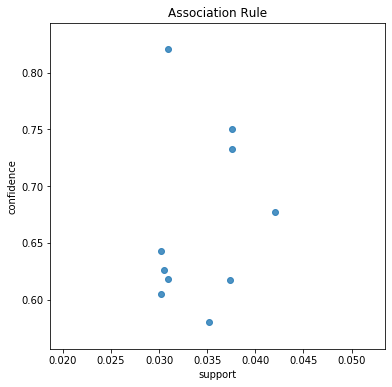

In [215]:
plt.figure(figsize=(6,6))
plt.title('Association Rule')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

# Câu 5a

In [217]:
basket_1 = df[df['Country']=='Germany'].groupby(['InvoiceNo','Description'])['Quantity']

In [225]:
basket_1 = basket_1.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [226]:
basket_1 = basket_1.applymap(encode_data)

In [227]:
basket_1.drop('POSTAGE', axis=1, inplace=True) 

In [233]:
itemsets = apriori(basket_1, min_support=0.05, use_colnames=True)

In [234]:
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)

In [235]:
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0]).astype('unicode')
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0]).astype('unicode')

In [236]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'], '[',rules.loc[i, 'support'], ',',rules.loc[i, 'confidence'],']')

PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 , 0.5849056603773585 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 , 0.5714285714285714 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 , 0.5396825396825397 ]
RED RETROSPOT CHARLOTTE BAG ==> WOODLAND CHARLOTTE BAG [ 0.05908096280087528 , 0.8437500000000001 ]
ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 , 0.8333333333333333 ]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 , 0.5357142857142857 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 , 0.6808510638297872 ]
WOODLAND CHARLOTTE BAG ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 , 0.5 ]


In [237]:
support = rules['support'].values
confidence = rules['confidence'].values

In [238]:
plt.figure(figsize=(6,6))
plt.title('Association Rule')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

In [264]:
itemsets = fpgrowth(basket_1, min_support=0.05, use_colnames=True)

In [265]:
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)

In [266]:
rules

antecedents                           consequents  \
0   (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
1  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)   
2              (WOODLAND CHARLOTTE BAG)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
3       (PLASTERS IN TIN CIRCUS PARADE)    (PLASTERS IN TIN WOODLAND ANIMALS)   
4                  (SPACEBOY LUNCH BOX)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
5         (RED RETROSPOT CHARLOTTE BAG)              (WOODLAND CHARLOTTE BAG)   
6    (PLASTERS IN TIN WOODLAND ANIMALS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
7            (PLASTERS IN TIN SPACEBOY)    (PLASTERS IN TIN WOODLAND ANIMALS)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.157549            0.245077  0.131291    0.833333  3.400298   
1            0.245077            0.157549  0.131291    0.535714  3.400298   
2            0.126915            0.245077  0.063457    0.500000  2.040179   
3            0.115974            0.137856  0.067834    0.584906  4.242887   
4            0.102845            0.245077  0.070022    0.680851  2.778116   
5            0.070022            0.126915  0.059081    0.843750  6.648168   
6            0.137856            0.245077  0.074398    0.539683  2.202098   
7            0.107221            0.137856  0.061269    0.571429  4.145125   

   leverage  conviction  
0  0.092679    4.529540  
1  0.092679    1.814509  
2  0.032354    1.509847  
3  0.051846    2.076984  
4  0.044817    2.365427  
5  0.050194    5.587746  
6  0.040613    1.640006  
7  0.046488    2.011670

In [267]:
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0]).astype('unicode')
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0]).astype('unicode')

In [268]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'], '[',rules.loc[i, 'support'], ',',rules.loc[i, 'confidence'],']')

ROUND SNACK BOXES SET OF 4 FRUITS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 , 0.8333333333333333 ]
ROUND SNACK BOXES SET OF4 WOODLAND ==> ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 , 0.5357142857142857 ]
WOODLAND CHARLOTTE BAG ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 , 0.5 ]
PLASTERS IN TIN CIRCUS PARADE ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 , 0.5849056603773585 ]
SPACEBOY LUNCH BOX ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 , 0.6808510638297872 ]
RED RETROSPOT CHARLOTTE BAG ==> WOODLAND CHARLOTTE BAG [ 0.05908096280087528 , 0.8437500000000001 ]
PLASTERS IN TIN WOODLAND ANIMALS ==> ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 , 0.5396825396825397 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 , 0.5714285714285714 ]


In [269]:
support = rules['support'].values
confidence = rules['confidence'].values

In [270]:
plt.figure(figsize=(6,6))
plt.title('Association Rule')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

# Câu 5b

In [271]:
basket_2 = df[df['Country']=='France'].groupby(['InvoiceNo','Description'])['Quantity']

In [272]:
basket_2 = basket_2.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [274]:
basket_2.drop('POSTAGE', axis=1, inplace=True) 

In [275]:
basket_2 = basket_2.applymap(encode_data)

In [276]:
itemsets = apriori(basket_2, min_support=0.07, use_colnames=True)

In [277]:
rules = association_rules(itemsets, metric='confidence', min_threshold=0.7)

In [278]:
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0]).astype('unicode')
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0]).astype('unicode')

In [279]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'], '[',rules.loc[i, 'support'], ',',rules.loc[i, 'confidence'],']')

ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469 , 0.7631578947368421 ]
ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE GREEN [ 0.07397959183673469 , 0.725 ]
ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE RED [ 0.07908163265306123 , 0.8157894736842106 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE GREEN [ 0.07908163265306123 , 0.8378378378378379 ]
ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE RED [ 0.07397959183673469 , 0.725 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469 , 0.7837837837837838 ]
DOLLY GIRL LUNCH BOX ==> SPACEBOY LUNCH BOX [ 0.07142857142857142 , 0.717948717948718 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.10459183673469388 , 0.7592592592592594 ]
SET/6 RED SPOTTY PAPER CUPS ==> SET/20 RED RETROSPOT PAPER NAPKINS [ 0.10204081632653061 , 0.7407407407407408 ]
SET/20 RED RETROSPOT PAPER NAPKINS ==> SET/6 RED SPOTTY PAPER CUPS [ 0.10204081632653061 , 0.7692307692307692 ]
S

In [280]:
support = rules['support'].values
confidence = rules['confidence'].values

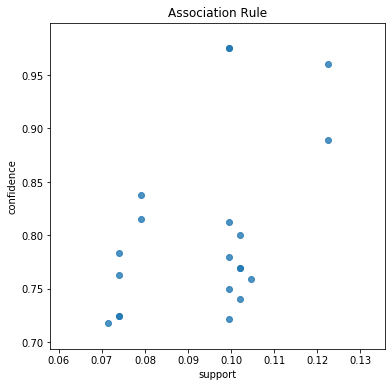

In [281]:
plt.figure(figsize=(6,6))
plt.title('Association Rule')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

In [282]:
itemsets = fpgrowth(basket_2, min_support=0.07, use_colnames=True)

In [283]:
rules = association_rules(itemsets, metric='confidence', min_threshold=0.7)

In [284]:
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0]).astype('unicode')
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0]).astype('unicode')

In [285]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'], '[',rules.loc[i, 'support'], ',',rules.loc[i, 'confidence'],']')

ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469 , 0.7631578947368421 ]
ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE GREEN [ 0.07397959183673469 , 0.725 ]
ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE RED [ 0.07908163265306123 , 0.8157894736842106 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE GREEN [ 0.07908163265306123 , 0.8378378378378379 ]
ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE RED [ 0.07397959183673469 , 0.725 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE PINK [ 0.07397959183673469 , 0.7837837837837838 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS [ 0.10459183673469388 , 0.7592592592592594 ]
SET/6 RED SPOTTY PAPER CUPS ==> SET/6 RED SPOTTY PAPER PLATES [ 0.12244897959183673 , 0.888888888888889 ]
SET/6 RED SPOTTY PAPER PLATES ==> SET/6 RED SPOTTY PAPER CUPS [ 0.12244897959183673 , 0.96 ]
SET/6 RED SPOTTY PAPER PLATES ==> SET/20 RED RETROSPOT PAPER NAPKINS [ 0.10204081632653061 , 0.8 ]
SET/20 RED RETR

In [286]:
support = rules['support'].values
confidence = rules['confidence'].values

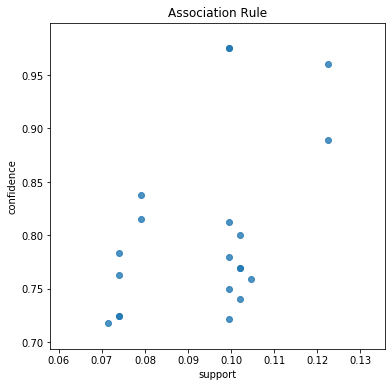

In [287]:
plt.figure(figsize=(6,6))
plt.title('Association Rule')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)